T3 Sprint

This improved code demonstrates Homomorphic Encryption (HE) using the Paillier cryptosystem with enhanced features for scalability, usability, and efficiency. It allows encryption and decryption of single or batch values with support for parallel processing, making it suitable for large datasets. The code includes secure aggregation, enabling encrypted values to be summed without decryption, and secure search functionality to check if specific query values exist in encrypted datasets. Results, such as the decrypted sum and query outcomes, are saved to a JSON file for analysis. Additionally, the code features dynamic user input for values and queries, with visualization capabilities using bar charts to present query results interactively. This modular and efficient design ensures robust privacy-preserving analytics and computation.

In [1]:
# Install required library
!pip install phe

from phe import paillier
import time
import json
from concurrent.futures import ThreadPoolExecutor

In [2]:
# Generate public and private keys
def generate_keys():
    public_key, private_key = paillier.generate_paillier_keypair()
    return public_key, private_key

# Encrypt a single value
def encrypt_value(value, public_key):
    return public_key.encrypt(value)

# Decrypt a single value
def decrypt_value(encrypted_value, private_key):
    return private_key.decrypt(encrypted_value)

# Batch encryption with parallelism
def batch_encrypt(values, public_key):
    """
    Encrypts a list of values using the public key in parallel.
    """
    with ThreadPoolExecutor() as executor:
        encrypted_values = list(executor.map(public_key.encrypt, values))
    return encrypted_values

# Batch decryption with parallelism
def batch_decrypt(encrypted_values, private_key):
    """
    Decrypts a list of encrypted values using the private key in parallel.
    """
    with ThreadPoolExecutor() as executor:
        decrypted_values = list(executor.map(private_key.decrypt, encrypted_values))
    return decrypted_values

In [3]:
# Secure addition
def secure_add(encrypted_value1, encrypted_value2):
    """
    Performs homomorphic addition of two encrypted values.
    """
    return encrypted_value1 + encrypted_value2

# Secure aggregation
def secure_aggregate(encrypted_values):
    """
    Aggregates a list of encrypted values using homomorphic addition.
    """
    aggregate = encrypted_values[0]
    for value in encrypted_values[1:]:
        aggregate += value
    return aggregate

# Secure search for a single query
def secure_search(encrypted_values, query_value, public_key, private_key):
    """
    Searches for a query value in a list of encrypted values.
    """
    encrypted_query = encrypt_value(query_value, public_key)
    for encrypted_value in encrypted_values:
        if decrypt_value(encrypted_value, private_key) == query_value:
            return True
    return False

# Secure multi-query search
def multi_query_search(encrypted_values, query_values, public_key, private_key):
    """
    Searches for multiple query values in a list of encrypted values.
    """
    results = []
    for query in query_values:
        result = secure_search(encrypted_values, query, public_key, private_key)
        results.append(result)
    return results

Enter values (comma-separated): 10,20,30
Enter query values (comma-separated): 20,30,40,50,60
Keys generated.
Values encrypted.
Decrypted sum of values: 60
Search result for query value 20: True
Search result for query value 30: True
Search result for query value 40: False
Search result for query value 50: False
Search result for query value 60: False
Results saved to he_demo_results.json


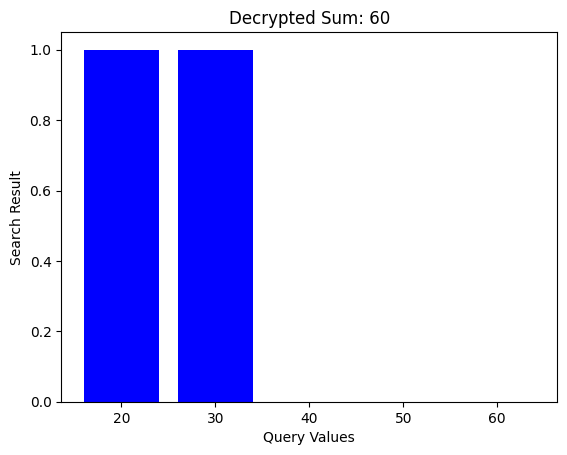

Time taken to run the demo: 19.8050479888916 seconds


In [6]:
# Save results to a JSON file
def save_results_to_file(filename, results):
    """
    Saves results to a JSON file.
    """
    with open(filename, 'w') as f:
        json.dump(results, f)

# Visualization of results
def visualize_results(decrypted_sum, query_results, queries):
    """
    Visualizes the decrypted sum and query results.
    """
    try:
        import matplotlib.pyplot as plt

        # Bar chart for query results
        plt.bar([str(query) for query in queries], query_results, color='blue')
        plt.xlabel('Query Values')
        plt.ylabel('Search Result')
        plt.title(f'Decrypted Sum: {decrypted_sum}')
        plt.show()
    except ImportError:
        print("matplotlib is not installed. Skipping visualization.")

# Homomorphic Encryption Demonstration
def HE_demo(values, queries):
    # Record the start time
    start_time = time.time()

    # Generate keys
    public_key, private_key = generate_keys()
    print("Keys generated.")

    # Encrypt values
    encrypted_values = batch_encrypt(values, public_key)
    print("Values encrypted.")

    # Perform secure aggregation
    encrypted_sum = secure_aggregate(encrypted_values)
    decrypted_sum = decrypt_value(encrypted_sum, private_key)
    print(f"Decrypted sum of values: {decrypted_sum}")

    # Perform secure search
    query_results = multi_query_search(encrypted_values, queries, public_key, private_key)
    for query, result in zip(queries, query_results):
        print(f"Search result for query value {query}: {result}")

    # Save results to a file
    results = {"Decrypted Sum": decrypted_sum, "Query Results": query_results}
    save_results_to_file("he_demo_results.json", results)
    print("Results saved to he_demo_results.json")

    # Visualize results
    visualize_results(decrypted_sum, query_results, queries)

    # Record the end time
    end_time = time.time()

    # Calculate the time taken
    time_taken = end_time - start_time
    print(f"Time taken to run the demo: {time_taken} seconds")

# Dynamic input for values and queries
values = list(map(int, input("Enter values (comma-separated): ").split(',')))
queries = list(map(int, input("Enter query values (comma-separated): ").split(',')))

# Run the demonstration
HE_demo(values, queries)


* Supports batch encryption and decryption with parallelism for performance.

* Includes secure addition, Supports secure aggregation.

* Includes single and multi-query search.

* Uses ThreadPoolExecutor for parallelism, improving performance for large datasets.

* Saves results to a JSON file for later analysis.

* Provides a bar chart for query results using matplotlib.

* Accepts dynamic user inputs for values and queries.

* Measures overall time with better handling of large-scale operations.

* Highly modular and flexible for future expansions, Better suited for demonstrations and real-world applications due to additional features.